# Analyze Titanic Data 



### 1. Introduction

The purpose of this project is to build an analysis from the Titanic Survivors data set provided by Kaggle using Pandas and Numpy dependencies within Python. [(Kaggle: Titanic)](https://www.kaggle.com/c/titanic) This data set contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. In this data investigation I will focus in analysing the factors that made it more likely for a person to survive on the Titanic. Our established hypothesis is that higher class passengers, females, and younger people had a higher chance of surviving. 

### 2. Data Investigation
I will begin by browsing the data structure and understanding what variables are included in the data, particularly the meaning and type of each variable and if neccesary convert variables into format that is fit for data analysis.

Once I am able to understand variables, I will explore and understand my dataset by answering useful questions using panda and matplotlib to bring together useful insights into graphs. I will also use descriptive statistics to define corralation between survivors and non-survivors. The variables that showed evident difference between two groups are likely to have had an impact on chance of survival.  

#### Loding Data
To begin I will import pandas for data structure analisis and matplotlib for ploting graphs using python and load data from csv file. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
data = pd.read_csv("titanic_data.csv") 

##### *What is the size of my data set?*

From my evaluation I can confirm that the size of our data set has 891 rows and 12 columns by calling the following:

In [3]:
#Find length of data
#len(data)
# Look at the shape of the dataFrame object, and it has 891 rows and 12 columns.
data.shape 

(891, 12)

##### *What variables are within data sctructure?*

In [4]:
# Build data structure sample. 
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Bellow I have attached description to each variable.

| Variable Name |  Variable Description | 
|---------------|-----------------------|
|PassengerID| Passenger ID|
|   Survived  |  Survival (0 = No;1 = Yes)|
|Pclass|Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|
|Name|Name|
|Sex|Sex|
|Age|Age|
|SibSp| Number of Siblings/Spouses Aboard|
|Parch|Number of Parents/Children Aboard|
|Ticket|Ticket Number|
|Fare|Passenger Fare|
|Cabin|Cabin|
|Embarked|Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

Now that I am able to understand our variables, I could dive into evaluating if we have any missing fields within our data set.

In [5]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
# Check whether the columns to be analyzed having any missing values, how many missing values each column has.
def null_count(data):
    data_null = pd.isnull(data)
    data_null_true = data[data_null == True]
    null_count = len(data_null_true)
    return null_count
data.apply(null_count) # Let's check how many missing values each column has. 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

I have establish that there are missing fields within our data (Age, Cabin, and Embarked).  Missing alot of Age data does affect our age evaluation, however, a possibe solution would be to replace empty fields with an estimated average. 

Missing the vast majority of Cabin data is be a bit problematic when evauating how far away from posible safetey this cabin was located. 


For the sake of this evaluation I will continue to evaluate data without ommiting any data.

##### *How many male and female are counted within data set?*

In [38]:
#Find Sex count
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

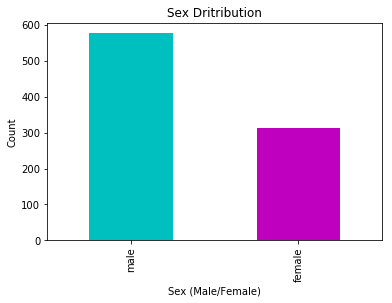

In [108]:
data['Sex'].value_counts().plot(kind='bar',
                                color=['c','m'])
plt.title("Sex Dritribution")
plt.xlabel("Sex (Male/Female)")
plt.ylabel("Count")

There are far more male passenges than female passengers in the data.

##### *What are the lowest and largest Age values?*

In [30]:
#Find lowest and Largest Age value 
data['Age'].min(), data['Age'].max()

(0.41999999999999998, 80.0)

In [61]:
# Take a closer look at the distribution of the age of passengers. It has a wide range of age span.
data['Age'].describe() 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

From my evaluation I find that the youngest was probably a baby just a few months old with a value converted to decimal. The age distributions for male and female passenges on board are similar. Most passengers are adults below 40s and there are also a few children and senior citizens on abroad.

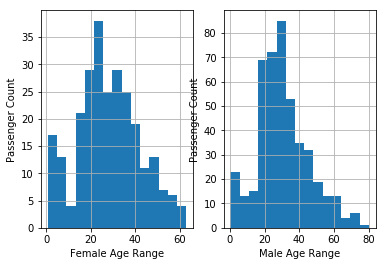

In [67]:
fig = plt.figure()
fig1 = fig.add_subplot(1,2,1)
plt.xlabel("Female Age Range")
plt.ylabel("Passenger Count")
data[data['Sex']=="female"]['Age'].hist(bins=15)
fig2 = fig.add_subplot(1,2,2)
data[data['Sex']=="male"]['Age'].hist(bins=15)
plt.xlabel("Male Age Range")
plt.ylabel("Passenger Count")

##### *How where passengers distributed between class within data set?*

In [40]:
#Find Passenger Class Distribution
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
# Average age by class
data.groupby('Pclass')['Age'].mean() 
data.groupby('Pclass')[['Age']].describe()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Tentative conclusions is: On average, the first class passengers are older than the second class, and the ones in second class are older than the those in the third class.

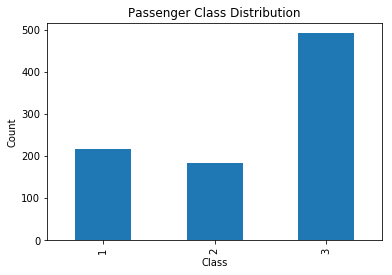

In [133]:
data['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.title("Passenger Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

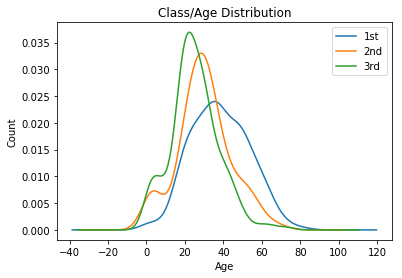

In [92]:
plt.subplot2grid
for x in [1,2,3]:
        data.Age[data.Pclass == x].plot(kind="kde")
plt.title("Class/Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(("1st", "2nd", "3rd")) 

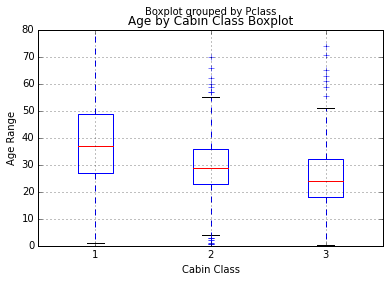

In [9]:
data.boxplot(column=["Age"],by=["Pclass"])
plt.title("Age by Cabin Class Boxplot")
plt.xlabel("Cabin Class")
plt.ylabel("Age Range")

##### *How many passengers survived?*

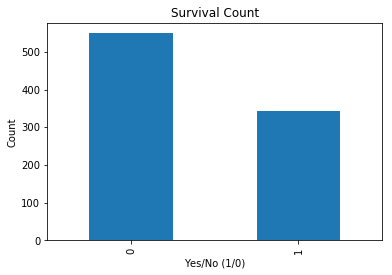

In [124]:
data['Survived'].value_counts().plot(kind='bar')
plt.title("Survival Count")
plt.xlabel("Yes/No (1/0)")
plt.ylabel("Count")

In [36]:
#Find Survival count
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

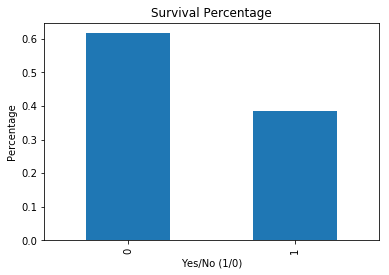

In [22]:
#Find Normalized Survival Percentage
data['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.title("Survival Percentage")
plt.xlabel("Yes/No (1/0)")
plt.ylabel("Percentage")

In [37]:
#Find Survival Percentage
data['Survived'].value_counts()*100/len(data)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

From my evaluation of this sample data set, I find that about 38% survivied and 62% did not survive.

##### *What was the survival distribution based on Sex?*

In [107]:
# Male Sruvival Distribution
data[data['Sex'] == 'male']['Survived'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

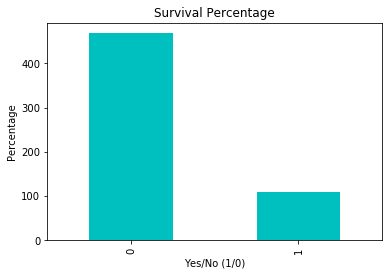

In [176]:
data[data['Sex'] == 'male']['Survived'].value_counts().sort_index().plot(kind='bar', color=['c'])
plt.title("Male Sruvival Distribution")
plt.title("Survival Percentage")
plt.xlabel("Yes/No (1/0)")
plt.ylabel("Percentage")

In [162]:
# Female Sruvival Distribution
data[data['Sex'] == 'female']['Survived'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

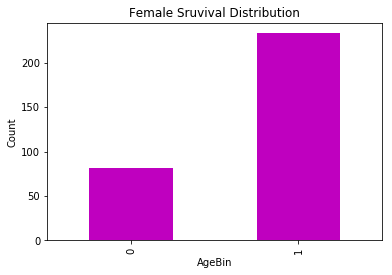

In [177]:
data[data['Sex'] == 'female']['Survived'].value_counts().sort_index().plot(kind='bar', color=['m'])
plt.title("Female Sruvival Distribution")
plt.xlabel("AgeBin")
plt.ylabel("Count")

##### *What was the survival distribution based on Age?*

In [101]:
#Positive Survival/Age Distibution
data[data['Survived'] == 1]['Age'].value_counts()

24.00    15
36.00    11
35.00    11
27.00    11
22.00    11
30.00    10
19.00     9
32.00     9
18.00     9
29.00     8
31.00     8
28.00     7
4.00      7
34.00     6
42.00     6
26.00     6
40.00     6
16.00     6
25.00     6
48.00     6
33.00     6
17.00     6
23.00     5
1.00      5
50.00     5
45.00     5
21.00     5
3.00      5
38.00     5
39.00     5
         ..
54.00     3
58.00     3
52.00     3
2.00      3
44.00     3
60.00     2
13.00     2
56.00     2
9.00      2
51.00     2
63.00     2
6.00      2
62.00     2
8.00      2
0.83      2
41.00     2
0.75      2
37.00     1
47.00     1
0.42      1
0.92      1
11.00     1
53.00     1
55.00     1
43.00     1
80.00     1
7.00      1
32.50     1
12.00     1
0.67      1
Name: Age, Length: 65, dtype: int64

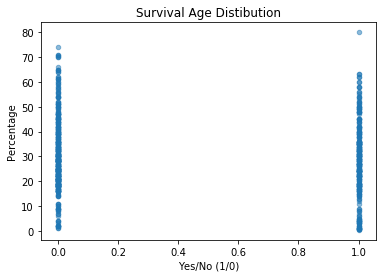

In [110]:
data.plot(kind='scatter', x='Survived', y='Age', alpha=.5)
plt.title("Survival Age Distibution Scattered Box Plot")
plt.xlabel("Yes/No (1/0)")
plt.ylabel("Percentage")

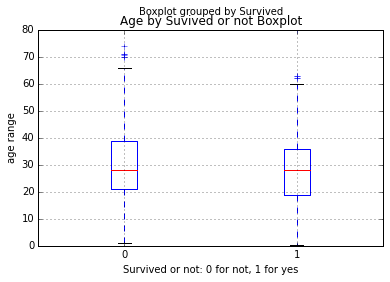

In [11]:
data.boxplot(column=["Age"],by=["Survived"])
plt.title("Survival Age Distibution")
plt.xlabel("Yes/No (1/0)")
plt.ylabel("Percentage")
# It's hard to find any clue through the boxplot below.Let's do further analysis.

In [136]:
# Define an age group for different ranges of age.
def age_group(age):
    if age < 18:
        return "young" 
    if 18 <= age < 60:
        return "adult"
    if age >= 60:
        return "senior"  
data["age_group"] = data["Age"].apply(age_group)

In [170]:
data.groupby(["age_group"])['Survived'].mean()

age_group
adult     0.386087
senior    0.269231
young     0.539823
Name: Survived, dtype: float64

From this sample data set seems that more young (age<18) passengers survived. 

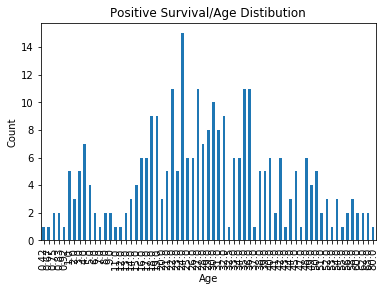

In [111]:
data[data['Survived'] == 1]['Age'].value_counts().sort_index().plot(kind='bar')
plt.title("Positive Survival/Age Distibution")
plt.xlabel("Age")
plt.ylabel("Count")

Based on previous graph it is hard to find correlation related to survaval based on age. Since there is very large range of ages drom our data set I would have to organize age ranges in bins to better understand visualization.

In [112]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
data['AgeBin'] = pd.cut(data['Age'], bins)

In [113]:
#Positive Survival/Age Distibution
data[data['Survived'] == 1]['AgeBin'].value_counts()

(20, 30]    84
(30, 40]    69
(10, 20]    44
(0, 10]     38
(40, 50]    33
(50, 60]    17
(60, 70]     4
(70, 80]     1
Name: AgeBin, dtype: int64

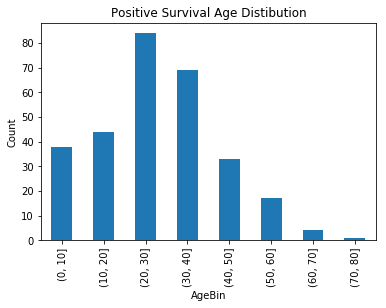

In [54]:
data[data['Survived'] == 1]['AgeBin'].value_counts().sort_index().plot(kind='bar')
plt.title("Positive Survival/Age Distibution")
plt.xlabel("AgeBin")
plt.ylabel("Count")

In [98]:
#Negative Survival/Age Distibution
data[data['Survived'] == 0]['AgeBin'].value_counts()

(20, 30]    146
(30, 40]     86
(10, 20]     71
(40, 50]     53
(0, 10]      26
(50, 60]     25
(60, 70]     13
(70, 80]      4
Name: AgeBin, dtype: int64

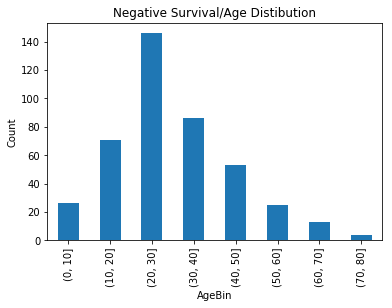

In [56]:
data[data['Survived'] == 0]['AgeBin'].value_counts().sort_index().plot(kind='bar')
plt.title("Negative Survival/Age Distibution")
plt.xlabel("AgeBin")
plt.ylabel("Count")

##### *What was the survival distribution based on Sex?*

In [173]:
#Positive Survival/Sex Distibution
data[data['Survived'] == 1]['Sex'].value_counts().sort_index()

female    233
male      109
Name: Sex, dtype: int64

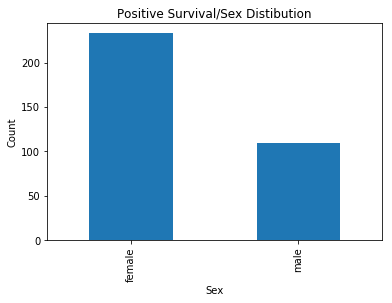

In [174]:
data[data['Survived'] == 1]['Sex'].value_counts().sort_index().plot(kind='bar')
plt.title("Positive Survival/Sex Distibution")
plt.xlabel("Sex")
plt.ylabel("Count")

In [172]:
#Negative Survival/Sex Distibution
data[data['Survived'] == 0]['Sex'].value_counts().sort_index()

female     81
male      468
Name: Sex, dtype: int64

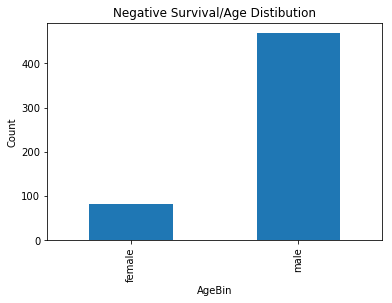

In [171]:
data[data['Survived'] == 0]['Sex'].value_counts().sort_index().plot(kind='bar')
plt.title("Negative Survival/Sex Distibution")
plt.xlabel("Sex")
plt.ylabel("Count")

In [16]:
data.groupby('Sex')['Survived'].mean() # The tentative conclusion is that female has a much higher survival rate than male.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [17]:
female_count = len(data[data['Sex']=='female'])
print female_count

314


In [18]:
male_count = len(data[data['Sex']=='male'])
print male_count

577


Based on the sample data set, 74% of female passengers survived and only 19% of male passengers survived.

##### *What are the general demographics and passengers distibution by class (gender,age etc)?    *

In [17]:
data.groupby('Pclass')[['Sex']].describe()

Sex                  
       count unique   top freq
Pclass                        
1        216      2  male  122
2        184      2  male  108
3        491      2  male  347

In [18]:
data.groupby('Pclass')[['Age']].describe()

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Pclass                                                           
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0

In [19]:
data.groupby('Pclass')[['Parch']].describe()

Parch                                             
        count      mean       std  min  25%  50%  75%  max
Pclass                                                    
1       216.0  0.356481  0.693997  0.0  0.0  0.0  0.0  4.0
2       184.0  0.380435  0.690963  0.0  0.0  0.0  1.0  3.0
3       491.0  0.393075  0.888861  0.0  0.0  0.0  0.0  6.0

In [20]:
data.groupby('Pclass')[['SibSp']].describe()

SibSp                                             
        count      mean       std  min  25%  50%  75%  max
Pclass                                                    
1       216.0  0.416667  0.611898  0.0  0.0  0.0  1.0  3.0
2       184.0  0.402174  0.601633  0.0  0.0  0.0  1.0  3.0
3       491.0  0.615071  1.374883  0.0  0.0  0.0  1.0  8.0

##### *What was the survival distribution based on Class?*

In [14]:
data.groupby('Pclass')['Survived'].sum() 

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [15]:
data.groupby('Pclass')['Survived'].mean() 

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

It seems the first class passengers have a much higher change of survival than the second class, also the second class has a higher rate of 
survival than the third class.

In [140]:
#Positive Class Survival Count
data[data['Survived'] == 1]['Pclass'].value_counts().sort_index()

1    136
2     87
3    119
Name: Pclass, dtype: int64

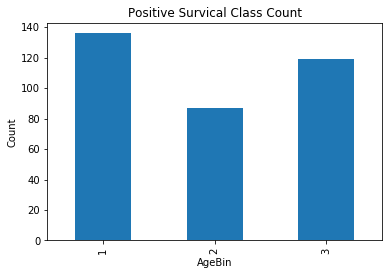

In [141]:
data[data['Survived'] == 1]['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.title("Positive Survival Class Count")
plt.xlabel("Class")
plt.ylabel("Count")

In [140]:
#Negative Class Survival Count
data[data['Survived'] == 0]['Pclass'].value_counts().sort_index()

1    136
2     87
3    119
Name: Pclass, dtype: int64

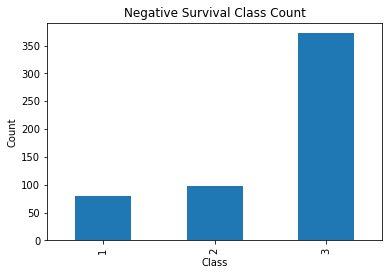

In [145]:
data[data['Survived'] == 0]['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.title("Negative Survival Class Count")
plt.xlabel("Class")
plt.ylabel("Count")

In [160]:
# Male Positive Survical Class Count
data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Pclass'].value_counts().sort_index()

1    45
2    17
3    47
Name: Pclass, dtype: int64

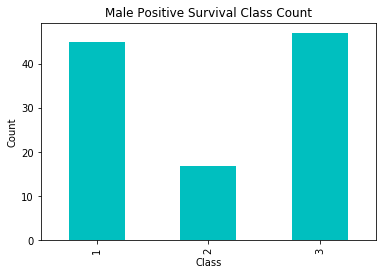

In [181]:
data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Pclass'].value_counts().sort_index().plot(kind='bar', color=['c'])
plt.title("Male Positive Survival Class Count")
plt.xlabel("Class")
plt.ylabel("Count")

In [158]:
#Male Negative Survival Class Count
data[(data['Sex'] == 'male') & (data['Survived'] == 0)]['Pclass'].value_counts().sort_index()

1     77
2     91
3    300
Name: Pclass, dtype: int64

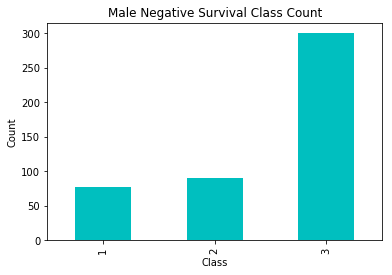

In [182]:
data[(data['Sex'] == 'male') & (data['Survived'] == 0)]['Pclass'].value_counts().sort_index().plot(kind='bar', color=['c'])
plt.title("Male Negative Survival Class Count")
plt.xlabel("Class")
plt.ylabel("Count")

In [156]:
# Female Positive Survival Class Count
data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Pclass'].value_counts().sort_index()

1    91
2    70
3    72
Name: Pclass, dtype: int64

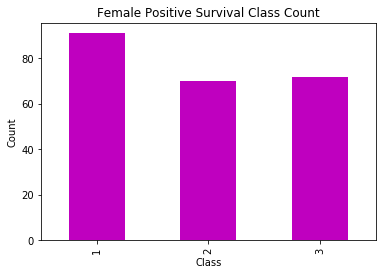

In [183]:
data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Pclass'].value_counts().sort_index().plot(kind='bar', color=['m'])
plt.title("Female Positive Survival Class Count")
plt.xlabel("Class")
plt.ylabel("Count")

In [154]:
#Female Negative Survival Class Count
data[(data['Sex'] == 'female') & (data['Survived'] == 0)]['Pclass'].value_counts().sort_index()

1     3
2     6
3    72
Name: Pclass, dtype: int64

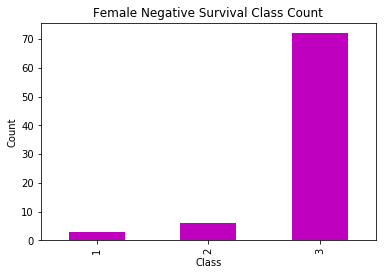

In [184]:
data[(data['Sex'] == 'female') & (data['Survived'] == 0)]['Pclass'].value_counts().sort_index().plot(kind='bar', color=['m'])
plt.title("Female Negative Survival Class Count")
plt.xlabel("Class")
plt.ylabel("Count")

##### *What was passenger embark distribution?

In [161]:
#Embarked Distribution
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

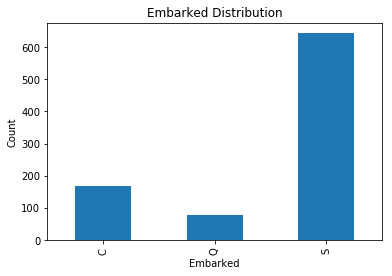

In [95]:
data['Embarked'].value_counts().sort_index().plot(kind='bar')
plt.title("Embarked Distribution")
plt.xlabel("Embarked")
plt.ylabel("Count")

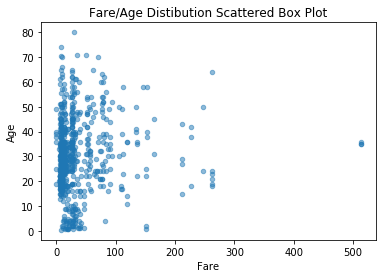

In [190]:
data.plot(kind='scatter', x='Fare', y='Age', alpha=.5)
plt.title("Fare/Age Distibution Scattered Box Plot")
plt.xlabel("Fare")
plt.ylabel("Age")

### 5. Results

##### *Summary statistics*

            Table 1. Mean and standard deviation of main variables of full sample and subsamples by survival 

|Variable | All Passengers | Not Survived | Survived| 
|:--------:|:-----:|:--------:|:------------:|
|Female| 0.35 | 0.18 | 0.68 |
| |(0.48)|(0.35)|(0.47)|
|Age|29.70|30.63|28.34|
| |(14.53)|(14.17)|(14.95)|
|Fare|32.20|22.12|48.40|
| |(49.69)|(31.39)|(66.60)|
|1st Class|0.24|0.15|0.40|
| |(0.43)|(0.35)|(0.49)|
|2nd Class|0.21|0.18|0.25|
| |(0.41)|(0.38)|(0.44)|
|3rd Class|0.55|0.68|0.35|
| |(0.50)|(0.47)|(0.48)|
|Port Cherbourg|0.19|0.14|0.27|
| |(0.39)|(0.34)|(0.45)|
|Port Queenstown|0.09|0.09|0.09|
| |(0.28)|(0.28)|(0.28)|
|Port Southampton|0.72|0.78|0.63|
| |(0.45)|(0.42)|(0.48)|
|Number of Siblings/Spouse Aboard| 0.52|0.55|0.47|
| |(1.10)|(1.29)|(0.71)|
|Numer of Parents/Children Aboard|0.38|0.33|0.46|
| |(0.81)|(0.82)|(0.77)|
|*N_Age*|714|424|290|
|*N_Port*|889|549|340|
|*N*|891|549|342|

`Note: "Age", "Class", and "Port of Embarked" have missing values.` 

From the summary statistics above, we can see that the total number of passengers in this data set is 891, among which 549 (61.62%) died in the disaster and 342(38.38%) survived. 

A variety of factors may have determined who could survive from the disaster. It seems that survivors and non-survivors had difference in most of their characteristics, given the mean values in their gender, age, class and so on.

## Statistical Test 
Although, we generated some tentative conclusions based on our data analysis, the significance still needs to be verified by conducting in-depth statistical analysis. 